# Perceptron

So let's start now with just building from the ground up the fundamental building block of 
every single neural network and that's going to be just a single neuron and in neural network language a single neuron is called a `perceptron`. 

The perceptron is a simple single layer neural network that takes an input vector $\boldsymbol{x} = [x_1, x_2, ..., x_n]$, multiplies it by a weight vector $\boldsymbol{w} = [w_1, w_2, ..., w_n]$, sums the weighted inputs, and passes the $\sum_i w_ix_i$ added to a bias $w_0$ as $z =  w_0 +  \sum_i w_ix_i$  through an activation function $g(z)$ to produce an output $\hat{y}$:

$$z = \mathrm{bias} + \mathrm{linear\_ combination\_ of \_ inputs}$$
$$z = w_0 + \boldsymbol{w}^T\boldsymbol{x} = w_0 +  \sum_i w_ix_i $$
$$\hat{y} = g(z) $$

The activation function $g$ introduces nonlinearity to allow the perceptron to learn complex mappings from inputs to outputs. Typical choices for $g$ are `sigmoid`, `tanh`, or `ReLU` functions, though the original perceptron used a step function.

The perceptron can be trained via supervised learning, adjusting the weights and biases to minimize the loss between the predicted $\hat{y}$ and the true label $y^{\text{true}}$. Backpropagation combined with gradient descent can be used to iteratively update the weights to reduce the loss.

The key components of a perceptron are:
* Input vector $\boldsymbol{x}$
* Weight vector $\boldsymbol{w}$
* Weighted sum $z = \boldsymbol{w}^T\boldsymbol{x}$
* Nonlinear activation $g$
* Output prediction $\hat{y}$

The perceptron provides a basic model of a neuron, and multilayer perceptrons composed of many interconnected perceptrons can be used to build neural networks with substantial representational power. A perceptron takes a set of inputs, scales them by corresponding weights, sums them together with a bias, applies a non-linear step function, and produces an output. This simple model can represent linear decision boundaries and serves as a building block for more complex neural networks. In training, weights are updated based on the difference between the predicted output and the actual label, often using the Perceptron learning algorithm.


![Perceptron](perceptron.png)

> Credits: Alexander Amini, MIT

## Weights and biases

The weights and biases are the parameters of the perceptron that allow it to learn complex mappings from inputs to outputs.

The weights $w_i$ determine how much influence each input $x_i$ has on the output. Inputs with higher weights have a larger impact. The bias $b$ allows the perceptron to shift the decision boundary away from the origin

The input vector:

$\boldsymbol{x} = [x_1, x_2, ..., x_n]$

The weight vector:

$\boldsymbol{w} = [w_1, w_2, ..., w_n]$

Mathematically, the weighted sum is calculated as:

$z = \boldsymbol{w}^T\boldsymbol{x} = w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n$

We then add the bias term $b$ as:

$z = \boldsymbol{w}^T\boldsymbol{x} + b$

Where $z$ is the pre-activation value before applying the nonlinear activation function.

Here is a simple Numpy function that implements a perceptron:

In [20]:
import numpy as np 

# Perceptron function
def perceptron(x, w, b):  
  # Calculate weighted sum
  z = np.dot(x, w) + b 
  return z

x = np.array([-1, 2])      # Example inputs   
w = np.array([3.0, -2.0])  # Example weights 
b = 1.0                    # Example bias    

# Generate prediction
y = perceptron(x, w, b)

# Print prediction
print('Prediction: %.3f' % (y))

Prediction: -6.000


### Nonlinear Activation Function

Activation functions are an important component of artificial neural networks. They introduce non-linearity into the network, allowing it to learn complex patterns in data. Without activation functions, a neural network would essentially be just a linear regression model.

![Why we need activation functions](why-activation.png)
> Credits: Alexander Amini, MIT

Some common activation functions include:

**Sigmoid**

The sigmoid function squashes the input into a range between 0 and 1, and is useful for models where we want to predict a probability as output. A downside is it can saturate and cause vanishing gradients. 

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

Use Sigmoid for binary classification problems where the output should be a probability between 0-1. Also useful as the output layer for multi-class classification.

**Tanh** 

The tanh function squashes the input into a range between -1 and 1. It is a rescaled version of the sigmoid function. Like sigmoid, it can saturate. 

$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

Use `Tanh` for models where you want your outputs centered around 0. Often used in recurrent neural networks.

Here is some Python code to plot these activation functions using numpy and matplotlib:

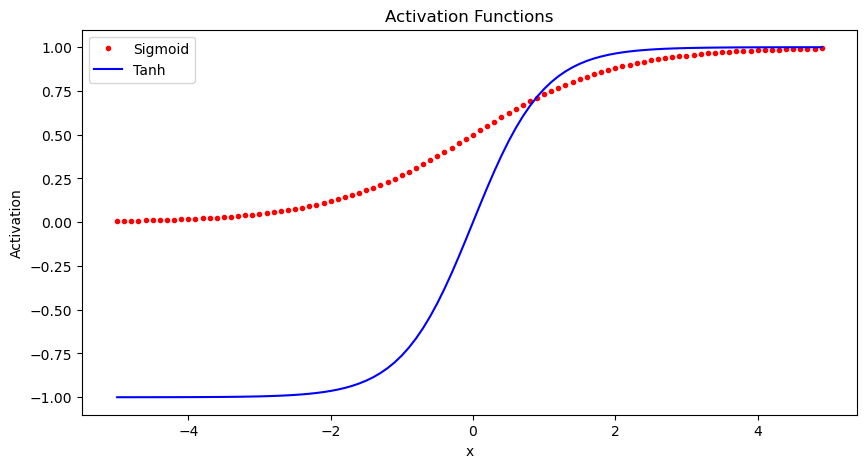

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)

# Sigmoid activation function
sigmoid = 1 / (1 + np.exp(-x))

# Tanh activation function
tanh = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)) 

# Plot the activation functions
plt.figure(figsize=(10,5))
plt.plot(x, sigmoid, 'r.', label='Sigmoid')
plt.plot(x, tanh, 'b-', label='Tanh')
plt.legend()
plt.xlabel('x')
plt.ylabel('Activation')
plt.title('Activation Functions')
plt.show()

**ReLU** The Rectified Linear Unit (ReLU) thresholds the input at zero, returning 0 for negative values and the raw input for positive values. It helps avoid vanishing gradients and is computationally efficient. However, it has a problem with "dying" neurons if inputs are consistently negative. For example, if a neuron in the first layer learns weights that result in a negative input, it will output 0. In backpropagation, since the gradient of the ReLU function is 0 for negative inputs, this neuron will not update its weights. Over time it will not activate on any data and is considered "dead".

This limits the model capacity as neurons can effectively die and remain inactive for the rest of training. LeakyReLU solves this by having a small negative slope (e.g. 0.01x), so even when inputs are negative it will propagate some gradient to update weights.

$$ f(x) = \max(0, x)$$

Use ReLU for hidden layers in networks where your inputs are always positive. It trains faster than sigmoid/tanh.

**LeakyReLU**

The Leaky ReLU introduces a small slope (e.g. 0.01x) for negative values instead of threshholding at zero. This helps solve the "dying neuron" problem of ReLU units. The small negative slope avoids saturation while keeping gradients flowing even for negative regions.

$$f(x) = \max(\alpha x, x)$$

Use LeakyReLU as a general purpose activation function that avoids both saturation and dying neurons.

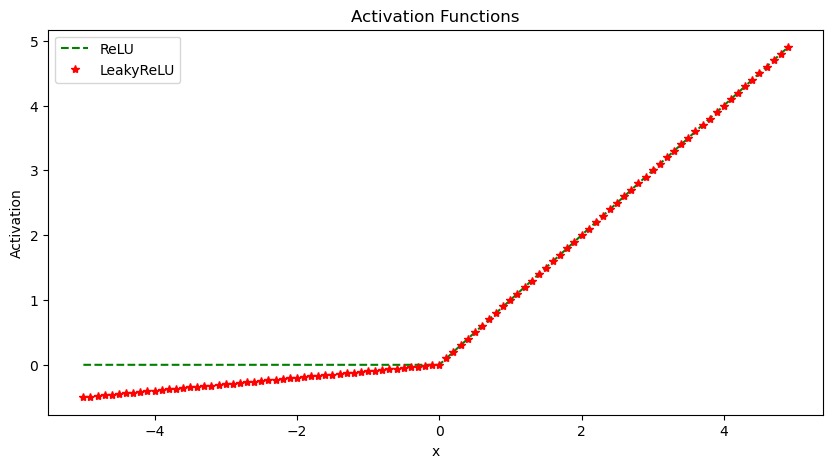

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)

# ReLU activation function
relu = np.maximum(0, x)

# LeakyReLU activation function
leaky_relu = np.maximum(0.1*x, x)

# Plot the activation functions
plt.figure(figsize=(10,5))
plt.plot(x, relu, 'g--', label='ReLU')
plt.plot(x, leaky_relu, 'r*', label='LeakyReLU')
plt.legend()
plt.xlabel('x')
plt.ylabel('Activation')
plt.title('Activation Functions')
plt.show()

## Perceptron: An example

Consider the following example of how a perceptron works. We have bias $b=1.0$ and $\mathbf{w} = [3; -2]$. 

$$
\begin{align}
\hat{y} & = g (b + (\boldsymbol{w}^T\boldsymbol{x})) \\
\hat{y} & = g (1 + (\begin{bmatrix} 3 \\ -2 \end{bmatrix}^T \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}))\\
\hat{y} & = g (1 + (3 * x_1 - 2 * x_2)) \\
\end{align}
$$

The term inside the non-linear function $g$ $(1 + 3 x_1 - 2 x_2)$ is a line in 2D. 

We can plot all possible inputs to this neural network on a decision boundary. This two-dimensional line acts as a plane separating the input space. The plane has directionality - inputs on one side produce a certain output, while inputs on the other side produce the opposite output. For example, the input [-1, 2] lies on one side of the plane and generates a positive output. When we plug the components into the equation, we get a positive number that passes through the nonlinear activation function, propagating a positive value. Inputs on the other side of the decision boundary generate the opposite output due to the thresholding function. The sigmoid activation sits at this decision boundary, controlling how inputs move to one side or the other.

For $\boldsymbol{x} = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$. We have

$$
\begin{align}
\hat{y} & = g (1 + (3 * x_1 - 2 * x_2)) \\
\hat{y} & = g (1 + (3 * -1  - 2 * 2)) \\
\hat{y} & = g (-6) \approx 0.002
\end{align}
$$

In this example, visualizing the full 2D input space is convenient because I can easily draw the decision boundary. However, most real-world problems have high-dimensional data. Image data contains thousands or millions of pixel values. Plotting decision boundaries is infeasible in high dimensions. This example provides intuition before building more complex models.

![nn-line](nn-line.png)
> Image credits: Alexander Amini, MIT

### Perceptron: An implementation

In [19]:
# Sigmoid function 
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Perceptron function
def perceptron(x, w, b):  
  # Calculate weighted sum
  z = np.dot(x, w) + b 
  y = sigmoid(z)
  return y

x = np.array([-1, 2])      # Example inputs   
w = np.array([3.0, -2.0])  # Example weights 
b = 1.0                    # Example bias

# Generate prediction
y = perceptron(x, w, b)

# Print prediction
print('Prediction: %.3f' % (y))

Prediction: 0.002


> 💡 As we are using the `sigmoid` activation function, try varying the input `x` to see how the output `y` changes. Try for a different input `x`, which is below the line.

### Single and multi-output perceptrons


A single perceptron neuron can be built up into a full neural network model. The key steps for a perceptron are:

* Dot product of inputs and weights
* Add bias
* Apply non-linear activation function

These steps propagate information to produce the output. In a neural network, every neuron performs these computations.

$$z = b + \sum_{j = 1}^m w_j x_j$$

To create a multi-layer perceptron with multiple outputs, we use multiple perceptrons in the output layer. Each perceptron controls one output, but all perceptrons share the same inputs.

To implement a multi-layer perceptron network from scratch:

* Initialize a weight matrix $\boldsymbol{w}$, where each row contains the weights for one perceptron.

* Initialize a bias vector $b$, one bias term per perceptron.

* Define a forward propagation function to pass inputs through the network:
    -  Compute the dot product of inputs $x$ and weights  $\boldsymbol{w}$
    -  Add the bias vector $b$
    -  Apply non-linear activation function $g(z)$
    -  Return outputs

$$z = b_i + \sum_{j = 1}^m w_{j,i} x_{j,i}$$

Because all inputs are densely connected to all outputs, these layers are called **Dense Layers**.

This forward function defines the computations for a complete neural network layer. Stacking layers together allows building deep networks with multiple nonlinear transformations.


![ouput of perceptrons](multioutput-perceptrons.png)

### Single-Layer Neural Network

A single layer neural network, also known as a perceptron, is the simplest type of neural network. It consists of a single layer of input nodes fully connected to a layer of output nodes.
        
Let's now focus on a single neuron $z_2$. Here $z_2$ takes the weighted inputs from $\boldsymbol{x}$ added to the bias term. 
        
$$z_2 = b_2^{(1)} + \sum_{j=1}^m w_{j,2}^{(1)} x_j = b_2^{(1)} + w_{1,2}^{(1)}x_1 + w_{2,2}^{(1)}x_2 + w_{m,2}^{(1)}x_m$$

![Single layer NN](single-layer-nn1.png)

Hidden layers are layers in a neural network that sit between the input layer and the output layer. While the input and output layers connect to the external world, hidden layers only connect to other neurons within the network.

Hidden layers enable neural networks to learn more complex relationships between inputs and outputs. Specifically, hidden layers allow the network to model nonlinear relationships, which is crucial for solving more difficult problems.

The power of deep neural networks comes from having multiple hidden layers. Each layer transforms the representation of the data into a slightly more abstract representation. With enough layers, very complex functions can be modeled.

The number of hidden layers and neurons per layer are part of the neural network architecture. Tuning the hidden layer structure is an important part of applying neural networks to a problem.


We define a hidden layer as: 

$$z_2 = b_i^{(1)} + \sum_{j=1}^m w_{j,i}^{(1)} x_j$$

Final output: 

$$\hat{y}_i = g(b_i^{(2)} + \sum_{j=1}^{d_1} w_{j,i}^{(2)} g(z_j))$$


![Single layer NN](single-layer-nn2.png)

## Using neural networks to model stress-strain behavior (Bingham model)

### Bingham model

The Bingham constitutive model describes the flow behavior of viscoplastic fluids that behave as rigid solids at low stresses but flow as viscous fluids at high stresses. There is a critical yield stress $\tau_y$ that must be exceeded before flow occurs. Once the yield stress is exceeded, the material flows as a viscous fluid with a constant plastic viscosity $\mu$. The constitutive equation is:

$\tau = \tau_y + \mu\dot{\gamma}$

Where $\tau$ is the shear stress, $\tau_y$ is the yield stress, $\mu$ is the plastic viscosity, and $\dot{\gamma}$ is the shear rate. For $\tau < \tau_y$, the shear rate is zero. For $\tau > \tau_y$, the shear rate is proportional to the excess shear stress ($\tau - \tau_y$) and the viscosity $\mu$. The Bingham model captures the dual rigid and viscous behaviors seen in materials like toothpaste, mayonnaise, concrete, drilling muds, etc. It provides a simple yet powerful constitutive framework for modeling viscoplastic fluid flows.

![bingham](bingham.png)

### Modeling Bingham fluid with single layer neural network

Let us now model the bingham fluid model using a neural network. The first step is to generate data. 

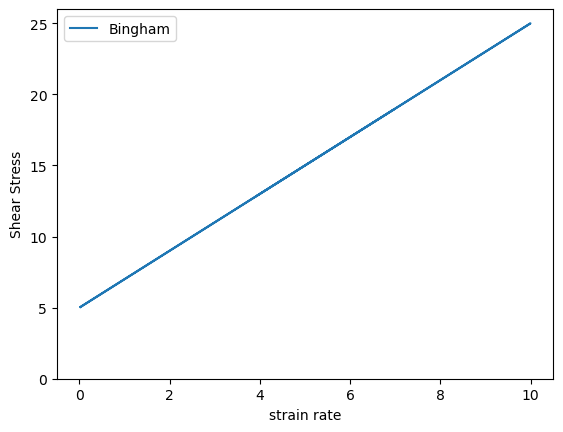

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
num_samples = 1000

# Range of strain rate values
v_values = np.random.rand(num_samples, 1) * 10
# Yield stress
tau0_true = 5.0
# Visocisty
mu_true = 2.0
# Shear stress = yield stress + viscosity * strain rate
y_true = tau0_true + mu_true * v_values

# Plot the bingham model
plt.plot(v_values, y_true, label='Bingham')
plt.ylim(0, None)
plt.xlabel('strain rate')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

### Initializing the single layer network

We are now going to define a single layer single neuron network, which has a bias value $b$ and a weight vector $w$ which is a scalar. We are only using the simple neuron without any non-linear activation function. 

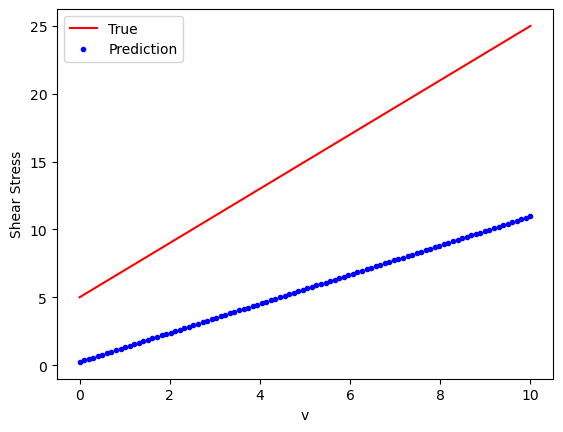

In [8]:
# Initialize model weights as random
weights = np.random.randn(1, 1)
bias = np.random.randn()

# Define the bingham NN model
def bingham_nn(x, w, b):
    return np.dot(x, w) + b

# Evaluation
v_eval = np.linspace(0, 10, 100).reshape(-1, 1)
y_true_eval = tau0_true + mu_true * v_eval
y_pred_eval = bingham_nn(v_eval, weights, bias)

# Plot
plt.plot(v_eval, y_true_eval, 'r-', label='True')
plt.plot(v_eval, y_pred_eval, 'b.', label='Prediction')
plt.xlabel('v')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

So, what went wrong? Our predictions do not match the true Bingham model. We have not actually trained the neural network. 

## Training a neural network

![SGD](sgd.gif)

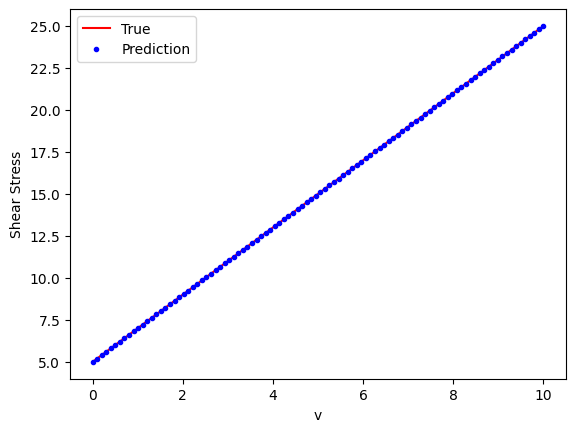

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
num_samples = 1000
v_values = np.random.rand(num_samples, 1) * 10
tau0_true = 5.0
mu_true = 2.0
y_true = tau0_true + mu_true * v_values

# Initialize model weights
weights = np.random.randn(1, 1)
bias = np.random.randn()
learning_rate = 0.01

# Training loop
epochs = 10000
# Loss history
losses = np.zeros(epochs)
for epoch in range(epochs):
    # Forward pass
    y_pred = np.dot(v_values, weights) + bias
    loss = ((y_pred - y_true) ** 2).mean()
    losses[epoch] = loss

    # Compute gradients
    grad_output = 2 * (y_pred - y_true) / num_samples
    grad_weights = np.dot(v_values.T, grad_output)
    grad_bias = grad_output.sum()

    # Update weights using gradient descent
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias

# Evaluation
v_eval = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred_eval = np.dot(v_eval, weights) + bias
y_true_eval = tau0_true + mu_true * v_eval

# Plot
plt.plot(v_eval, y_true_eval, 'r-', label='True')
plt.plot(v_eval, y_pred_eval, 'b.', label='Prediction')
plt.xlabel('v')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

### Plot loss history

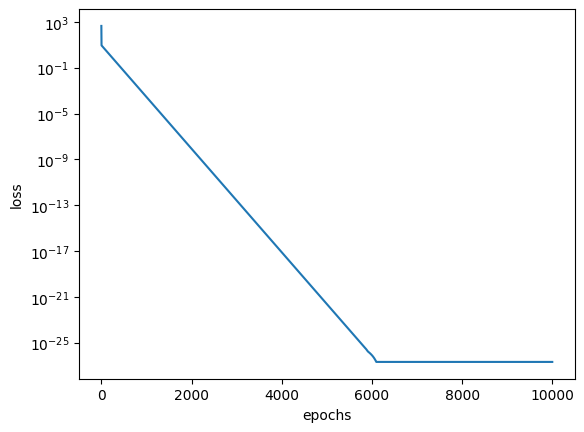

In [ ]:
plt.figure()
plt.semilogy(np.arange(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

### Weights and biases



In [ ]:
print("Weights: %.2f" % (weights))
print("Bias: %.2f" % (bias))

Weights: 2.04
Bias: 4.74


Given the mean squared error loss function:

$L = \frac{1}{N} \sum_{i=1}^{N} (y_{\text{pred},i} - y_{\text{true},i})^2$

where NN is the number of samples, $y_{pred,i}$ is the predicted value for the i-th sample, and $y_{true,i}$​ is the true value for the i-th sample.

We want to find the gradient of this loss with respect to the predictions $y_{pred,i}$​, so we'll take the derivative of the loss with respect to $y_{pred,i}$:

$\frac{\partial L}{\partial y_{\text{pred},i}} = \frac{2}{N} \sum_{i=1}^{N} (y_{\text{pred},i} - y_{\text{true},i})$


### PyTorch version

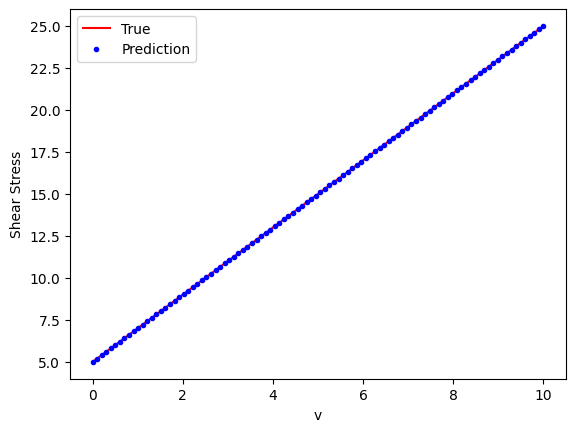

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


# Generate synthetic data
num_samples = 10000
v_values = torch.rand(num_samples, 1) * 10
tau0_true = 5.0
mu_true = 2.0
y_true = tau0_true + mu_true * v_values

model = nn.Sequential(nn.Linear(1, 1), nn.ReLU())

# Loss and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 5000
for epoch in range(epochs):
    model.zero_grad()
    y_pred = model(v_values)
    loss = loss_function(y_pred, y_true)
    loss.backward()
    optimizer.step()


# Evaluation
v_eval = torch.linspace(0, 10, 100).view(-1, 1)
y_pred = model(v_eval)
y_true_eval = tau0_true + mu_true * v_eval

# Plot
plt.plot(v_eval.numpy(), y_true_eval.numpy(), 'r-', label='True', )
plt.plot(v_eval.numpy(), y_pred.detach().numpy(), 'b.', label='Prediction')
plt.xlabel('v')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

## Multi-parameter perceptron

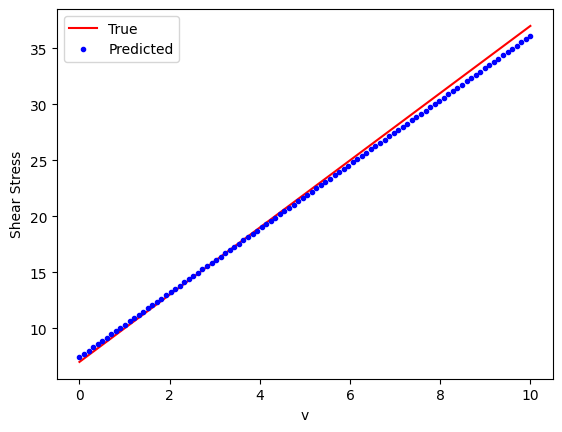

In [ ]:
# Generate data
num_samples = 10000
v_values = torch.rand(num_samples, 1) * 10
tau0_values = torch.rand(num_samples, 1) * 10
mu_values = torch.rand(num_samples, 1) * 5

# Inputs
inputs = torch.cat([v_values, tau0_values, mu_values], dim=1)

# Targets
y_true = tau0_values + mu_values * v_values

# Model
model = nn.Sequential(
    nn.Linear(3, 1),
    nn.ReLU()
)

# Training
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 5000
for epoch in range(epochs):
    y_pred = model(inputs)
    loss = loss_fn(y_pred, y_true)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluation
v_eval = torch.linspace(0, 10, 100).view(-1, 1)
tau0_eval = 7 * torch.ones_like(v_eval)
mu_eval = 3 * torch.ones_like(v_eval)

inputs_eval = torch.cat([v_eval, tau0_eval, mu_eval], dim=1)

y_pred = model(inputs_eval)
y_true_eval = tau0_eval + mu_eval * v_eval

# Plot
plt.plot(v_eval.numpy(), y_true_eval.numpy(), 'r-', label='True')
plt.plot(v_eval.numpy(), y_pred.detach().numpy(), 'b.', label='Predicted')

plt.xlabel('v')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

## Herschel-Buckley Nonlinear Model

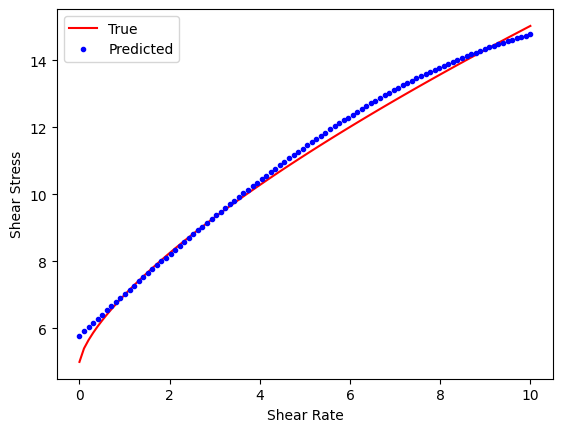

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate data
num_samples = 10000
v_values = torch.rand(num_samples, 1) * 10
tau0_values = torch.rand(num_samples, 1) * 5
k_values = torch.rand(num_samples, 1) * 2
n_values = torch.rand(num_samples, 1) * 0.5 + 0.5 # 0.5 - 1.0

# Inputs
inputs = torch.cat([v_values, tau0_values, k_values, n_values], dim=1)

# Targets
y_true = tau0_values + k_values * (v_values**n_values)

# Model
model = nn.Sequential(
   nn.Linear(4, 64),
   nn.Tanh(),
   nn.Linear(64,1)
)

# Training
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

epochs = 5000
for epoch in range(epochs):
   y_pred = model(inputs)
   loss = loss_fn(y_pred, y_true)

   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

# Evaluation
v_eval = torch.linspace(0, 10, 100).unsqueeze(1)
tau0_eval = 5 * torch.ones_like(v_eval)
k_eval = 2 * torch.ones_like(v_eval)
n_eval = 0.7 * torch.ones_like(v_eval)

inputs_eval = torch.cat([v_eval, tau0_eval, k_eval, n_eval], dim=1)
y_pred = model(inputs_eval)

y_true_eval = tau0_eval + k_eval * (v_eval**n_eval)

# Plot
plt.plot(v_eval.numpy(), y_true_eval.numpy(), 'r-', label='True')
plt.plot(v_eval.numpy(), y_pred.detach().numpy(), 'b.', label='Predicted')
plt.xlabel('Shear Rate')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()